<a href="https://colab.research.google.com/github/Yeasung-Kim/MAT-421/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation Problem Statement

**What is Interpolation?**

Interpolation is a mathematical method used to estimate unknown values within the range of a given dataset. Unlike extrapolation, which predicts values outside the known range, interpolation focuses solely on the values within the boundaries of the data points.

### Formula:
For interpolation, we aim to find a function `y = f(x)` such that:
1. It passes exactly through the known data points.
2. It can estimate values for any `x` between the minimum and maximum of the dataset.

### Real-World Example:
Consider a car whose speed is recorded at specific time intervals. Using interpolation, we can estimate the speed of the car at times when measurements were not recorded.

### Why Use Interpolation?
- To fill gaps in data.
- To make predictions within a known range.
- To ensure smooth transitions for graphical representations.


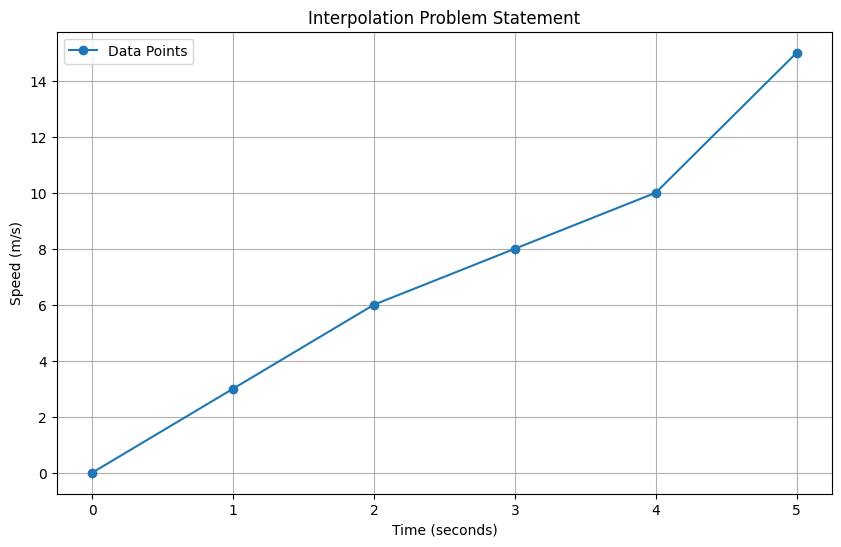

The dataset represents a car's speed (in m/s) recorded at specific times (in seconds).
Interpolation helps estimate the speed at any time within 0 to 5 seconds.


In [3]:
import matplotlib.pyplot as plt

# Known data points (time in seconds, speed in m/s)
x = [0, 1, 2, 3, 4, 5]
y = [0, 3, 6, 8, 10, 15]

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', label='Data Points')
plt.title('Interpolation Problem Statement')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

# Explanation of the dataset
print("The dataset represents a car's speed (in m/s) recorded at specific times (in seconds).")
print("Interpolation helps estimate the speed at any time within 0 to 5 seconds.")

# Linear Interpolation

**What is Linear Interpolation?**

Linear interpolation assumes that the change between two consecutive data points is linear (i.e., follows a straight line). This method connects the points with straight lines and uses them to estimate values at intermediate points.

### Formula:
For two known points, `(x1, y1)` and `(x2, y2)`, the value of `y` at any `x` between `x1` and `x2` is given by:

y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)

- `x1` and `x2`: Known data points along the x-axis.
- `y1` and `y2`: Known values at `x1` and `x2`, respectively.
- `x`: The value at which we want to estimate `y`.

### Example:
Suppose a car's speed is:
- 3 m/s at 1 second.
- 6 m/s at 2 seconds.

To estimate the speed at `x = 1.5` seconds:
y = 3 + (6 - 3) * (1.5 - 1) / (2 - 1) = 4.5 m/s.

### Advantages:
- Simple and quick.
- Suitable for datasets with linear trends.

### Limitations:
- It assumes data changes linearly, which might not be accurate for non-linear datasets.


In [4]:
from scipy.interpolate import interp1d

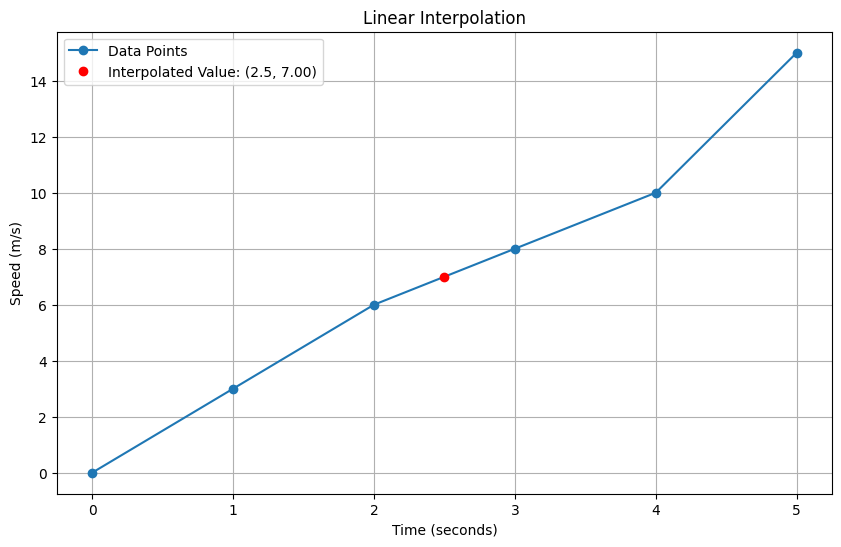

Linear Interpolation:
Given two data points: (2, 6) and (3, 8)
Estimate the speed at x = 2.5 seconds using the formula:
y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)
Substituting values: y = 6 + (8 - 6) * (2.5 - 2) / (3 - 2) = 7 m/s.
The estimated speed at x = 2.5 seconds is 7.00 m/s.


In [5]:
# Create a linear interpolation function
linear_interp = interp1d(x, y, kind='linear')

# Interpolating for a new value
x_new = 2.5  # Time at which speed is estimated
y_new = linear_interp(x_new)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', label='Data Points')
plt.plot(x_new, y_new, 'ro', label=f'Interpolated Value: ({x_new}, {y_new:.2f})')
plt.title('Linear Interpolation')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

# Explanation of the calculation
print("Linear Interpolation:")
print("Given two data points: (2, 6) and (3, 8)")
print("Estimate the speed at x = 2.5 seconds using the formula:")
print("y = y1 + (y2 - y1) * (x - x1) / (x2 - x1)")
print("Substituting values: y = 6 + (8 - 6) * (2.5 - 2) / (3 - 2) = 7 m/s.")
print(f"The estimated speed at x = {x_new} seconds is {y_new:.2f} m/s.")

# Cubic Spline Interpolation

**What is Cubic Spline Interpolation?**

Cubic spline interpolation is a method that fits a smooth curve through all data points. It uses piecewise cubic polynomials for each interval between data points and ensures smooth transitions by maintaining continuity in:
1. The curve itself.
2. The first derivative (slope).
3. The second derivative (curvature).

### Formula:
For two points `(x1, y1)` and `(x2, y2)`, the cubic polynomial is:
S(x) = a * (x - x1)^3 + b * (x - x1)^2 + c * (x - x1) + d

The coefficients `(a, b, c, d)` are calculated by solving equations that enforce:
1. The curve passes through `(x1, y1)` and `(x2, y2)`.
2. The first and second derivatives are continuous at each interval.

### Example:
Given a car's speed data:
- 3 m/s at 1 second.
- 6 m/s at 2 seconds.
- 8 m/s at 3 seconds.

Cubic spline interpolation creates a smooth curve that transitions seamlessly between these points, providing more accurate estimates for intermediate values.

### Advantages:
- Provides smooth and natural-looking curves.
- Captures non-linear trends effectively.

### Limitations:
- More complex than linear interpolation.
- Requires additional computational resources.

### Applications:
- Graphics and animations.
- Engineering simulations.
- Predictive modeling in data science.


In [6]:
from scipy.interpolate import CubicSpline
import numpy as np

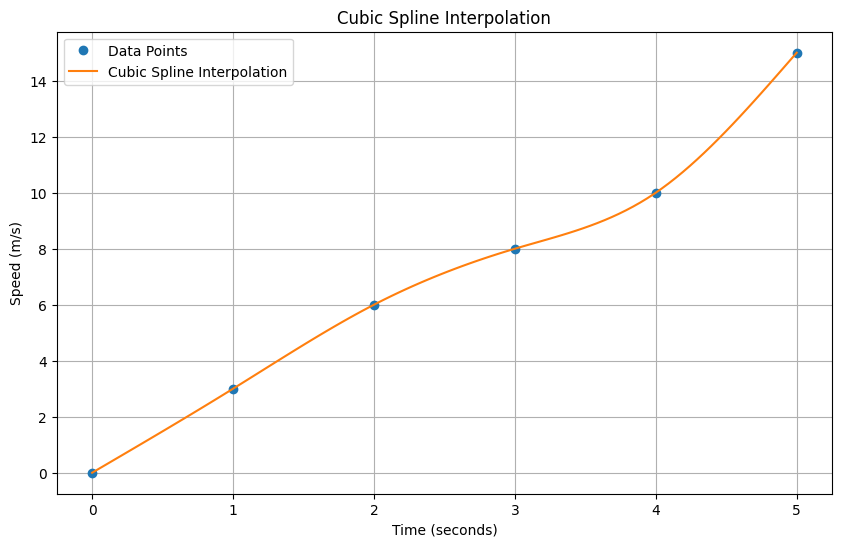

Cubic Spline Interpolation:
The cubic spline creates a smooth curve through all data points.
This ensures continuity of the slope and curvature, making it ideal for non-linear data trends.
For example, the estimated speed at x = 2.5 seconds would consider the curvature of the data.


In [7]:
# Create a cubic spline interpolation function
cubic_spline = CubicSpline(x, y, bc_type='natural')

# Generate dense data points for a smooth curve
x_dense = np.linspace(min(x), max(x), 100)
y_dense = cubic_spline(x_dense)

# Plot the cubic spline interpolation
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_dense, y_dense, '-', label='Cubic Spline Interpolation')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

# Explanation of the result
print("Cubic Spline Interpolation:")
print("The cubic spline creates a smooth curve through all data points.")
print("This ensures continuity of the slope and curvature, making it ideal for non-linear data trends.")
print("For example, the estimated speed at x = 2.5 seconds would consider the curvature of the data.")